<h1><center> ANIMALES: MODELO SVM </center></h1>

__Autor__:

1. David Montaño Castro.

Modelo para clasificar tipos de animales.

Paqueterías
---

In [1]:
### Pre procesing
import pandas as pd
import numpy as np

### Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Modeling
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Adjustments
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)
pd.set_option('display.max_columns', 90)

Importar datos
---

In [2]:
an = pd.read_csv("T2_zoo.csv"); an.head(5)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Información general
---

### Estructura

Hay 101 renglones y 18 características, de las cuales 1 es la variable a categorizar.

In [3]:
an.shape

(101, 18)

### Data types
Todas las columnas (excepto el nombre del animal) corresponden a estructuras de enteros.

In [4]:
an.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

### NaN o Null valores.
No existen valores nulos o nan en el conjunto de datos. No hay necesidad de sustituir valores.

In [5]:
an.isna().sum().where(lambda x: x>0).dropna()

Series([], dtype: float64)

### Descripción
1. Hay 7 categorías de animales, pues el min = 1 y el máximo = 2.
2. Todas las variables son dicotómicas, excepto por _legs_, que varía de 0 a 8 patas.
3. Según la documentación, el nombre del animal es único.

In [6]:
an.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


Visualización de los datos (3)
---

###  animal name
En la documentación aparece que el nombre de los animales es único; sin embargo, más abajo menciona sobre la existencia de 2 registros para "frog", lo cual resulta verdadero. 

In [7]:
an["animal name"].value_counts()

frog        2
housefly    1
rhea        1
aardvark    1
kiwi        1
           ..
wren        1
puma        1
piranha     1
pitviper    1
mongoose    1
Name: animal name, Length: 100, dtype: int64

Es verdad que existen dos registros de ranas; no obstante, estos son diferentes solamente en "venomous". Esto podría tratarse de un error, pues no existe razón para incluir el mismo animal dos veces aún cuando uno pueda tener diferentes características. Aun con esto, no eliminaré el registro.

In [8]:
an[an["animal name"] == "frog"]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


### eggs
Existen más registros de animáles vivíparos en este conjunto de datos. Exactamente estos representan el 58.41% del total de registros.

In [9]:
an.eggs.value_counts(normalize = True)

1    0.584158
0    0.415842
Name: eggs, dtype: float64

Text(0.5, 1.0, 'EGGS')

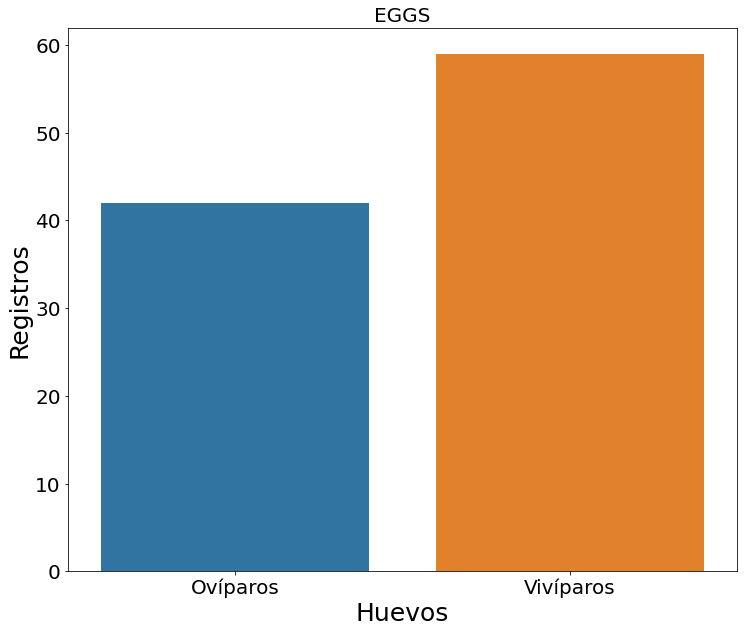

In [10]:
sns.countplot(an.eggs)
plt.xticks(ticks = range(0,2),labels = ["Ovíparos", "Vivíparos"],size = 20)
plt.yticks(size = 20)
plt.ylabel("Registros", size = 25)
plt.xlabel("Huevos", size = 25)
plt.title("EGGS", size = 20)

###  legs
La mayoría de los registros (37.62%) son de animales cuadrúpedos. En segundo lugar se tienen a los bípedos (26.73%) y en tercero, a los que no tienen patas (22.77%)

In [11]:
an.legs.value_counts(normalize = True)

4    0.376238
2    0.267327
0    0.227723
6    0.099010
8    0.019802
5    0.009901
Name: legs, dtype: float64

Text(0.5, 1.0, 'LEGS')

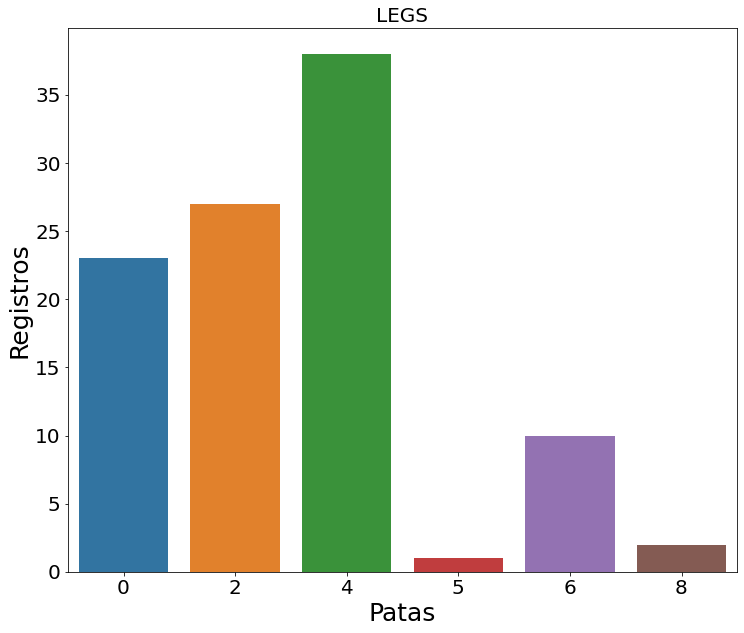

In [12]:
sns.countplot(an.legs)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel("Registros", size = 25)
plt.xlabel("Patas", size = 25)
plt.title("LEGS", size = 20)

Corroboraré que los animales que tienen 0 patas realmente se traten de animales sin patas y no de valores _nan_.

En su mayoría son peces.

In [13]:
an[an["legs"] == 0].head(5)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
13,clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7


###  domestic

En el conjunto de datos, hay más animales no domésticos (87.12 %) que animales domésticos (12.87 %).

In [14]:
an.domestic.value_counts(normalize = True)

0    0.871287
1    0.128713
Name: domestic, dtype: float64

Text(0.5, 1.0, 'DOMESTIC')

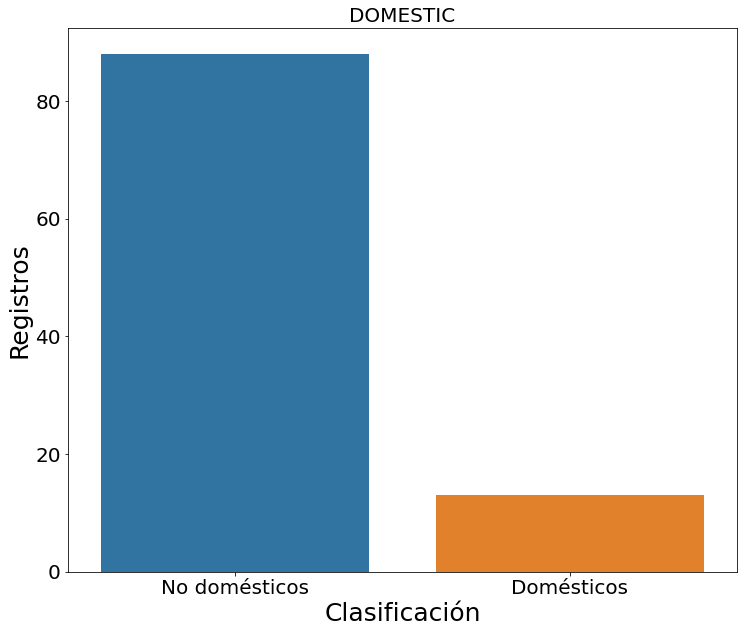

In [15]:
sns.countplot(an.domestic)
plt.xticks(ticks = range(0,2),labels = ["No domésticos", "Domésticos"],size = 20)
plt.yticks(size = 20)
plt.ylabel("Registros", size = 25)
plt.xlabel("Clasificación", size = 25)
plt.title("DOMESTIC", size = 20)

### Correlación entre todas las variables.
Variables como el cabello y la leche tienen una correlación lineal positiva fuerte. En particular, la leche y los huevos están negativamente correlacionados de manera muy considerable. También los huevos y el cabello estan correlacionados negativamente.

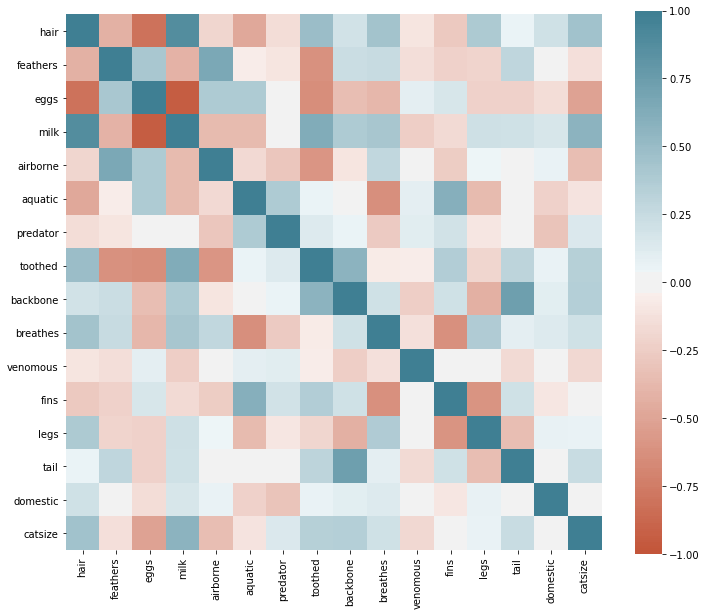

In [16]:
sns.heatmap(an.drop(columns = ["animal name","type"]).corr(method = "pearson"), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

Separar los datos
---
No tomaré en cuenta la variable del nombre.

In [17]:
X = an.drop(columns = ["animal name","type"])
Y = an.type
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.45, random_state = 0)

Modelado
---

### Kernel lineal

In [18]:
linear = svm.SVC(kernel = "linear")
linear.fit(X_train,Y_train)

SVC(kernel='linear')

#### Predicciones

In [19]:
Y_predl = linear.predict(X_test)

#### Evaluación
##### Score
El kernel lineal separa al 100% los datos de entrenamiento.

In [20]:
linear.score(X_train,Y_train)

1.0

##### Accuracy
Sin embargo, el los datos de prueba baja su eficacia a un 91.30% que tampoco es malo.

In [21]:
metrics.accuracy_score(Y_test,Y_predl)

0.9130434782608695

#### Matriz de confusión
El modelo lineal solo se equivocó en un valor real de categoría 3, este lo clasificó como de categoría 4 y 5, con mayor tendencia a clasificarlos como 3. De igual forma, el modelo etiquetó como de categoría 5 un elemento de la 3 En general el modelo es muy bueno, pues de los demás casos todos los clasificó correctamente.

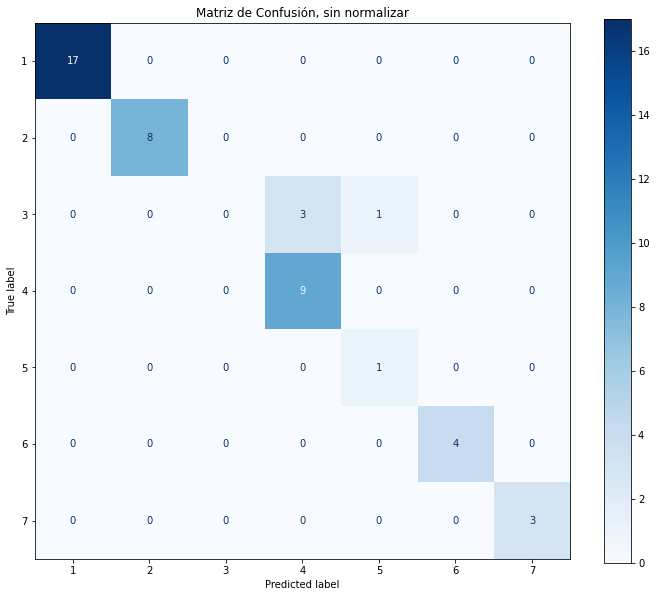

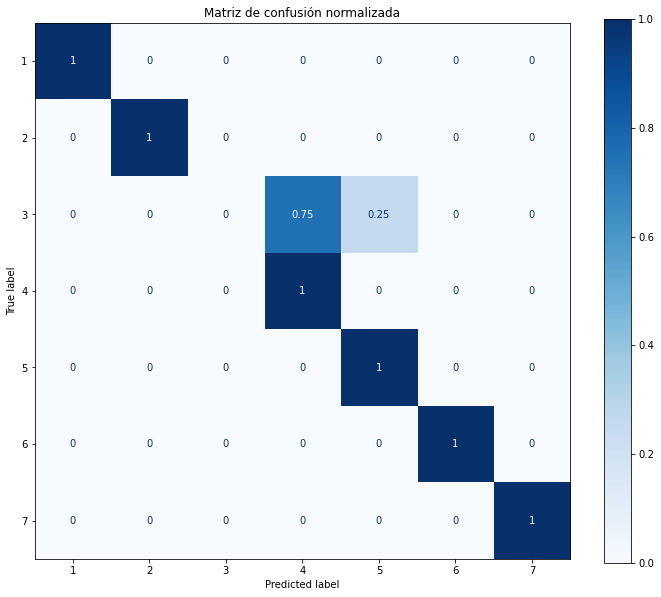

In [22]:
titles_options = [("Matriz de Confusión, sin normalizar", None),
                  ("Matriz de confusión normalizada", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(linear, X_test, Y_test,
                                 #display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

### Kernel Sigmoid

In [23]:
sigmoid = svm.SVC(kernel = "sigmoid")
sigmoid.fit(X_train,Y_train)

SVC(kernel='sigmoid')

#### Predicciones

In [24]:
Y_pred = sigmoid.predict(X_test)

#### Evaluación
##### Score
El kernel sigmoide separa al 74.54% los datos de entrenamiento.

In [25]:
sigmoid.score(X_train,Y_train)

0.7454545454545455

##### Accuracy
Por otra parte, el modelo sigmoide logra discriminar al 76% los datos de prueba, mejorando casi un 1.5% en comparación de los datos de entrenamiento.

In [26]:
metrics.accuracy_score(Y_test,Y_pred)

0.7608695652173914

#### Matriz de confusión
El modelo con kernel sigmoide es pésimo. Se nota que el modelo tiende a dar mayor pero a las categorías 1 y 2, pues 2 valores que no correspondián a la categoría 1 y 6 que no correspondían a la categoría 2 fueron mal clasificados. El modelo es tan malo que no logra identificar elementos de las categorías 5 y 6. 

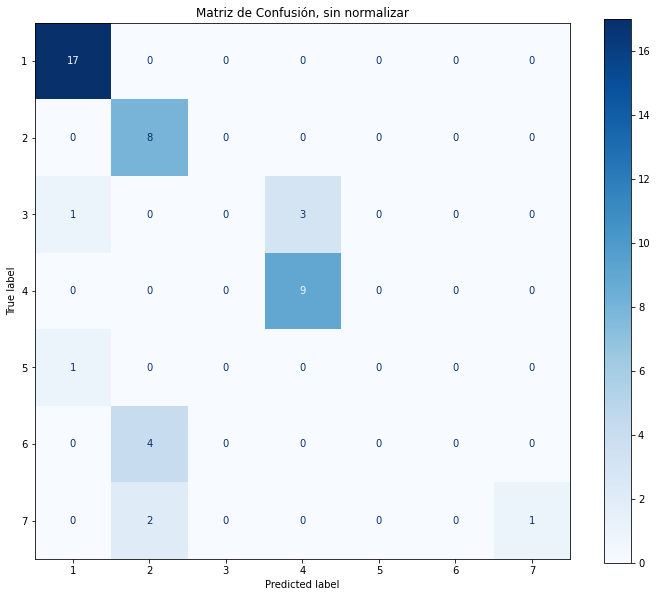

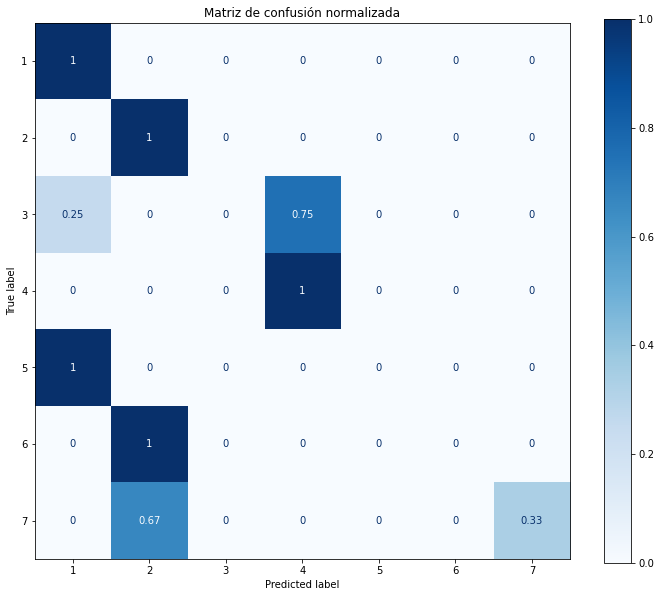

In [27]:
titles_options = [("Matriz de Confusión, sin normalizar", None),
                  ("Matriz de confusión normalizada", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(sigmoid, X_test, Y_test,
                                 #display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

Conclusiones
---
De los 2 modelos implementados, el mejor fue el lineal. Para empeza, hay que destacar el hecho de que el conjunto de datos es muy pequeño (101 registros) como para poder entrenar bien el modelo. Esto causa que los splits sean tan pequeños que en algunos casos solo tengamos 1 valor por categoría. De esta forma, por supuesto que el modelo no podrá desempeñarse de la mejor manera porque no tiene información suficiente con la cual alimentarse.

Respecto a por qué el modelo lineal es mejor, es sencillo notar que todos los valores F1 scores por categoría son superiores entre el lineal y el sigmoide. No hay necesidad de revisar precisión y recall uno por uno porque F score ya los considera. 

In [28]:
print("Modelo con sigmoide","\n",classification_report(Y_test,Y_pred))
print("\n")
print("Modelo con lineal","\n",classification_report(Y_test,Y_predl))

Modelo con sigmoide 
               precision    recall  f1-score   support

           1       0.89      1.00      0.94        17
           2       0.57      1.00      0.73         8
           3       0.00      0.00      0.00         4
           4       0.75      1.00      0.86         9
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       1.00      0.33      0.50         3

    accuracy                           0.76        46
   macro avg       0.46      0.48      0.43        46
weighted avg       0.64      0.76      0.68        46



Modelo con lineal 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         4
           4       0.75      1.00      0.86         9
           5       0.50      1.00      0.67         1
           6       1.00      1.00 

C:\Users\actda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
